In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3Jpd2EvRG9jdW1lbnRzL0dpdEh1Yi9UUC1TVk0='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1701988380.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1701988380.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1701988379.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1701988379.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1701988379.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1701988379.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1701988379.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/abc.py": 1701988379.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/io.py": 1701988379.0, "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/stat.py": 1701988379.0, "/Libr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

import os, sys
sys.path.insert(0, os.path.abspath("source")) 
from svm_source import *
from sklearn import svm
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from time import time

scaler = StandardScaler()

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [3]:
iris = datasets.load_iris()
X = iris.data
X = scaler.fit_transform(X)
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

# split train test
X, y = shuffle(X, y)
X_train = X[::2]
Y_train = y[::2].astype(int)
X_test = X[1::2]
Y_test = y[1::2].astype(int)

# fit the model
parameters = {'kernel': ['linear'], 'C': list(np.logspace(-3, 3, 200))}
clf = SVC()
clf_linear = GridSearchCV(clf, parameters, n_jobs=-1)
clf_linear.fit(X_train, Y_train)# ... TODO

# compute the score
print(clf_linear.best_params_)
print('Generalization score for linear kernel: %s, %s' %
      (clf_linear.score(X_train, Y_train),
       clf_linear.score(X_test, Y_test)))

{'C': np.float64(0.09115888299750818), 'kernel': 'linear'}
Generalization score for linear kernel: 0.68, 0.76


{'C': np.float64(0.001), 'degree': np.int64(3), 'gamma': np.float64(10.0), 'kernel': 'poly'}
Generalization score for polynomial kernel: 0.68, 0.58


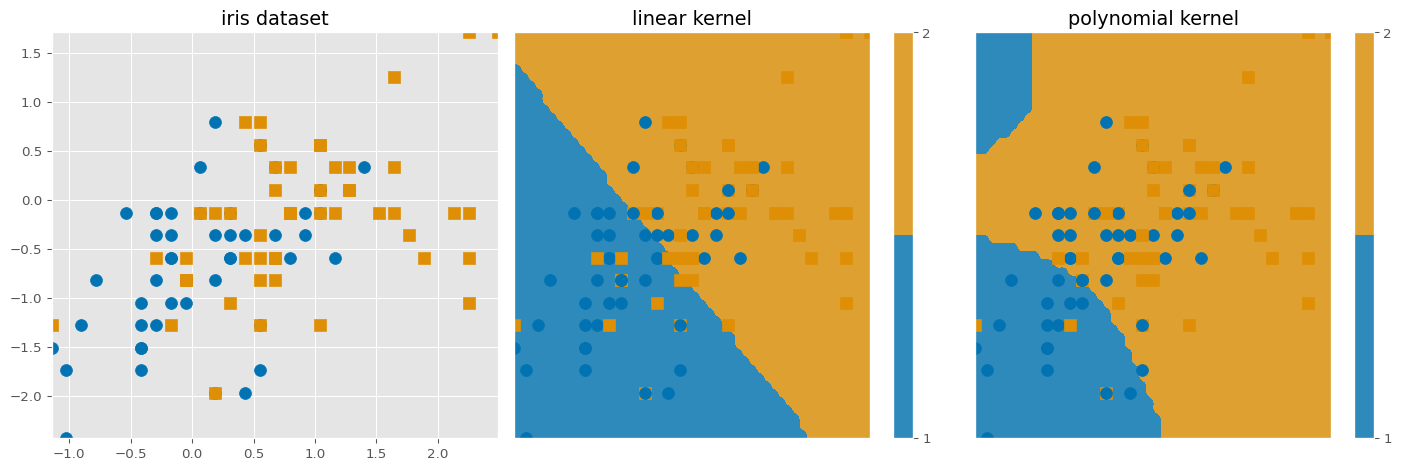

In [4]:
Cs = list(np.logspace(-3, 3, 5))
gammas = 10. ** np.arange(1, 2)
degrees = np.r_[1, 2, 3]

parameters = {'kernel': ['poly'], 'C': Cs, 'gamma': gammas, 'degree': degrees}
clf = SVC()
clf_poly = GridSearchCV(clf, parameters, n_jobs=-1)
clf_poly.fit(X_train, Y_train)
#clf_poly = # ... TODO
# ... TODO

print(clf_poly.best_params_)
print('Generalization score for polynomial kernel: %s, %s' %
      (clf_poly.score(X_train, Y_train),
       clf_poly.score(X_test, Y_test)))

# display your results using frontiere (svm_source.py)
def f_linear(xx):
    return clf_linear.predict(xx.reshape(1, -1))

def f_poly(xx):
    return clf_poly.predict(xx.reshape(1, -1))

plt.ion()
plt.figure(figsize=(15, 5))
plt.subplot(131)
plot_2d(X, y)
plt.title("iris dataset")

plt.subplot(132)
frontiere(f_linear, X, y)
plt.title("linear kernel")

plt.subplot(133)
frontiere(f_poly, X, y)

plt.title("polynomial kernel")
plt.tight_layout()
plt.draw()

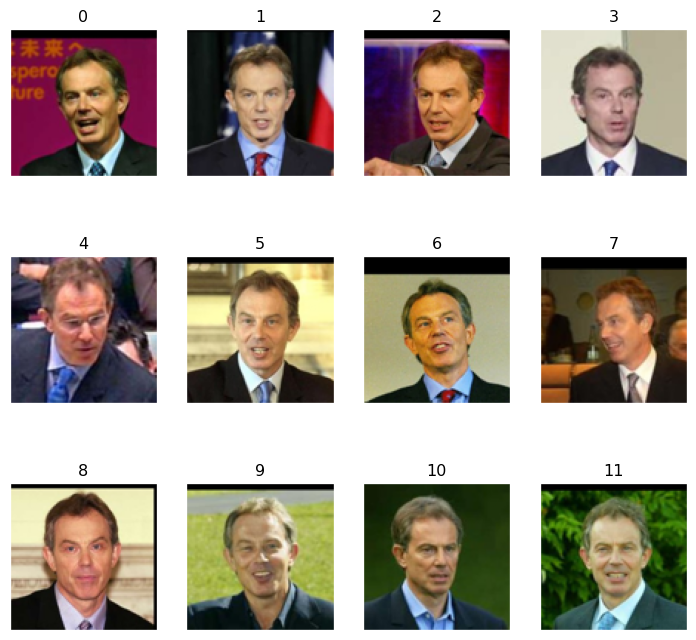

In [5]:
import os, ssl, certifi, urllib.request
# 1) pointer vers le bundle certifi
os.environ["SSL_CERT_FILE"] = certifi.where()
os.environ["REQUESTS_CA_BUNDLE"] = certifi.where()
# 2) forcer urllib à utiliser ce bundle
ctx = ssl.create_default_context(cafile=certifi.where())
opener = urllib.request.build_opener(urllib.request.HTTPSHandler(context=ctx))
urllib.request.install_opener(opener)

# Download the data and unzip; then load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True, data_home="./scikit_learn_data")
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(int)

# plot a sample set of the data
plot_gallery(images, np.arange(12))
plt.show()

# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0] // 2], indices[X.shape[0] // 2:]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[
    train_idx, :, :, :], images[test_idx, :, :, :]

--- Linear kernel ---
Fitting the classifier to the training set


Best C: 0.001


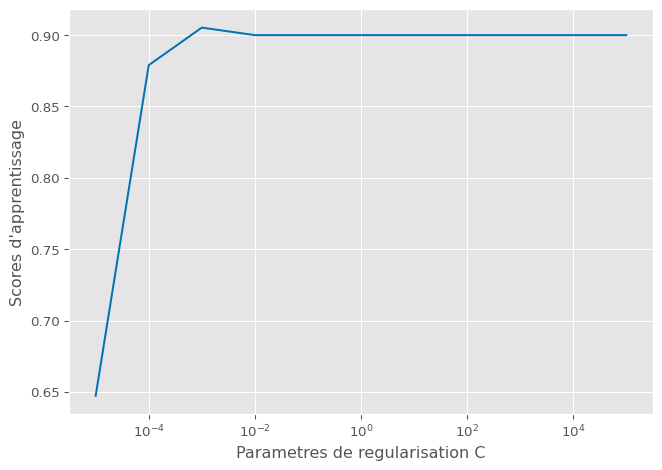

Best score: 0.9052631578947369
Predicting the people names on the testing set


done in 0.391s
Chance level : 0.6210526315789474
Accuracy : 0.9052631578947369


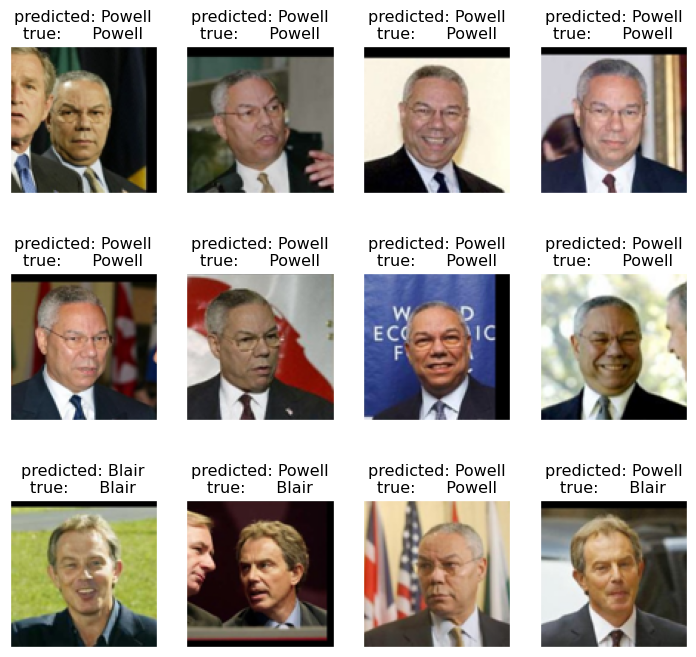

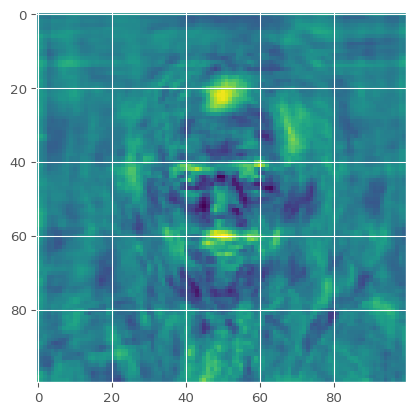

In [6]:
print("--- Linear kernel ---")
print("Fitting the classifier to the training set")
t0 = time()

# fit a classifier (linear) and test all the Cs
Cs = 10. ** np.arange(-5, 6)
scores = []
for C in Cs:
    # TODO ...
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

ind = np.argmax(scores)
print("Best C: {}".format(Cs[ind]))

plt.figure()
plt.plot(Cs, scores)
plt.xlabel("Parametres de regularisation C")
plt.ylabel("Scores d'apprentissage")
plt.xscale("log")
plt.tight_layout()
plt.show()
print("Best score: {}".format(np.max(scores)))

print("Predicting the people names on the testing set")
t0 = time()

# predict labels for the X_test images with the best classifier
clf = SVC(kernel='linear', C=Cs[ind])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("done in %0.3fs" % (time() - t0))
# The chance level is the accuracy that will be reached when constantly predicting the majority class.
print("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print("Accuracy : %s" % clf.score(X_test, y_test))

# Qualitative evaluation of the predictions using matplotlib

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
plt.show()

####################################################################
# Look at the coefficients
plt.figure()
plt.imshow(np.reshape(clf.coef_, (h, w)))
plt.show()

In [7]:
def run_svm_cv(_X, _y):
    _indices = np.random.permutation(_X.shape[0])
    _train_idx, _test_idx = _indices[:_X.shape[0] // 2], _indices[_X.shape[0] // 2:]
    _X_train, _X_test = _X[_train_idx, :], _X[_test_idx, :]
    _y_train, _y_test = _y[_train_idx], _y[_test_idx]

    _parameters = {'kernel': ['linear'], 'C': list(np.logspace(-3, 3, 5))}
    _svr = svm.SVC()
    _clf_linear = GridSearchCV(_svr, _parameters)
    _clf_linear.fit(_X_train, _y_train)

    print('Generalization score for linear kernel: %s, %s \n' %
          (_clf_linear.score(_X_train, _y_train), _clf_linear.score(_X_test, _y_test)))

print("Score sans variable de nuisance")
# TODO ... use run_svm_cv on original data
run_svm_cv(X, y)

print("Score avec variable de nuisance")
n_features = X.shape[1]
# On rajoute des variables de nuisances
sigma = 1
noise = sigma * np.random.randn(n_samples, 300, ) 
#with gaussian coefficients of std sigma
X_noisy = np.concatenate((X, noise), axis=1)
X_noisy = X_noisy[np.random.permutation(X.shape[0])]
# TODO ... use run_svm_cv on noisy data
run_svm_cv(X_noisy, y)

Score sans variable de nuisance


Generalization score for linear kernel: 1.0, 0.8789473684210526 

Score avec variable de nuisance


Generalization score for linear kernel: 0.9947368421052631, 0.5210526315789473 



In [8]:
print("Score apres reduction de dimension")

n_components = 200  # jouer avec ce parametre
pca = PCA(n_components=n_components).fit(X_noisy)
# ... TODO Apply PCA and run_svm to the noisy data
X_pca = pca.transform(X_noisy)
run_svm_cv(X_pca, y)

Score apres reduction de dimension


Generalization score for linear kernel: 0.9105263157894737, 0.5368421052631579 

